In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("exchange_rate.csv")

In [3]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [4]:
from dateutil.parser import parse #python understands only year-month-date

In [5]:
df['date']=df['date'].apply(lambda x:parse(x))

In [6]:
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-02-01,0.781800
2,1990-03-01,0.786700
3,1990-04-01,0.786000
4,1990-05-01,0.784900
...,...,...
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825


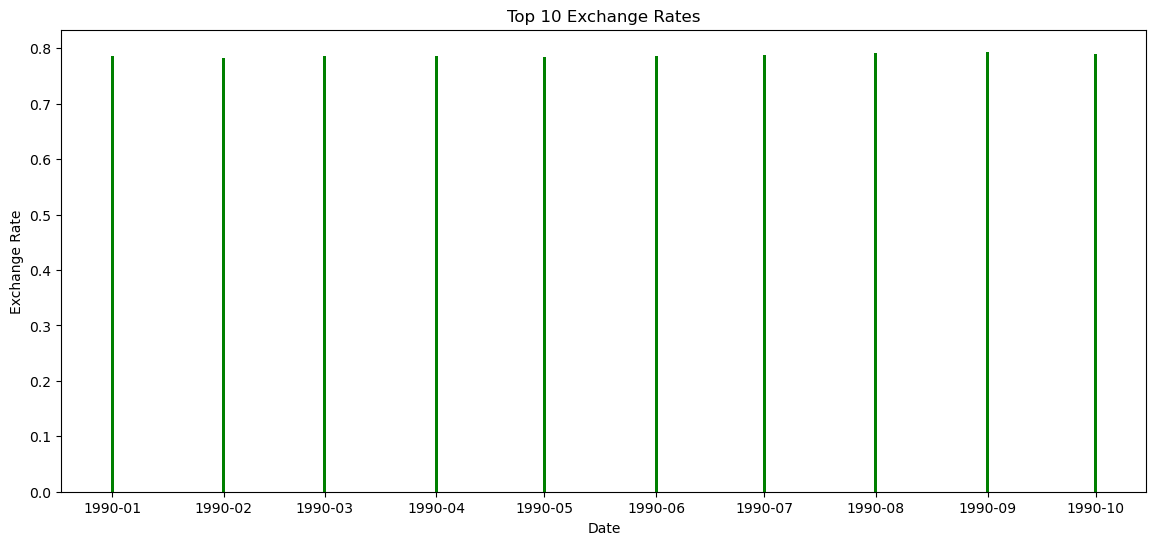

In [7]:
plt.figure(figsize=(14, 6))
plt.bar(df['date'].head(10), df['Ex_rate'].head(10), color='green')
plt.title('Top 10 Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

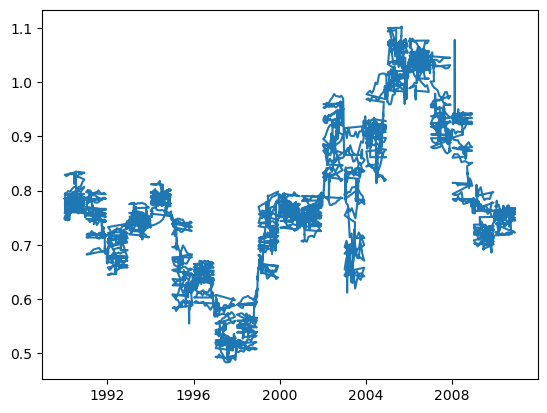

In [8]:
plt.plot(df['date'],df['Ex_rate'])

In [9]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [10]:
df.duplicated().sum()

0

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2010-01-10', '2010-02-10', '2010-03-10', '2010-04-10',
               '2010-05-10', '2010-06-10', '2010-07-10', '2010-08-10',
               '2010-09-10', '2010-10-10'],
              dtype='datetime64[ns]', name='date', length=7588, freq=None)

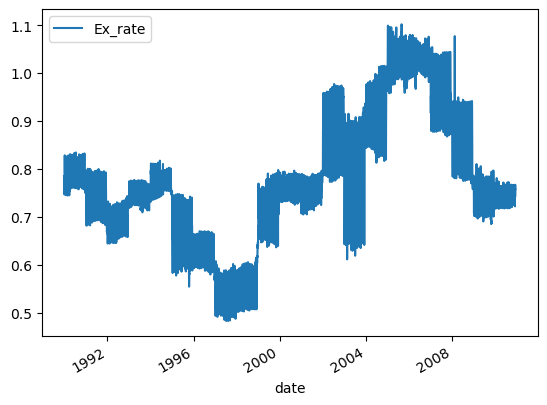

In [11]:
df.set_index('date',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()
df.index

In [12]:
## Terminologies

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
model=seasonal_decompose(df['Ex_rate'],model='multiplicative',period=12)

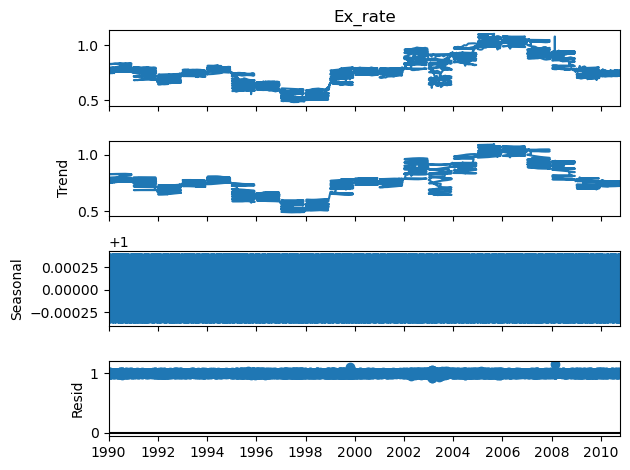

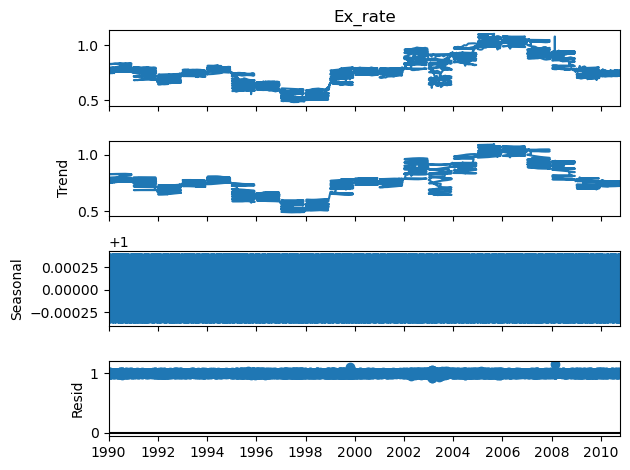

In [15]:
model.plot()

<Axes: xlabel='date'>

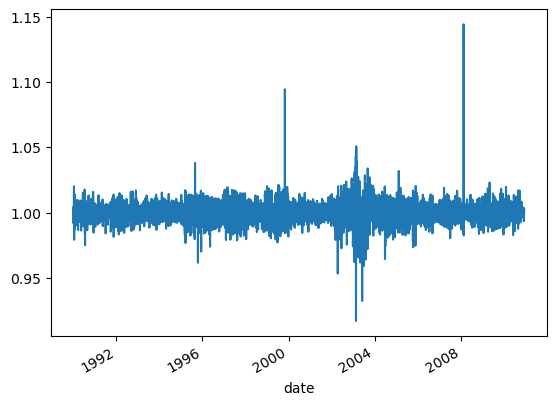

In [16]:
model.resid.plot()

<Axes: xlabel='date'>

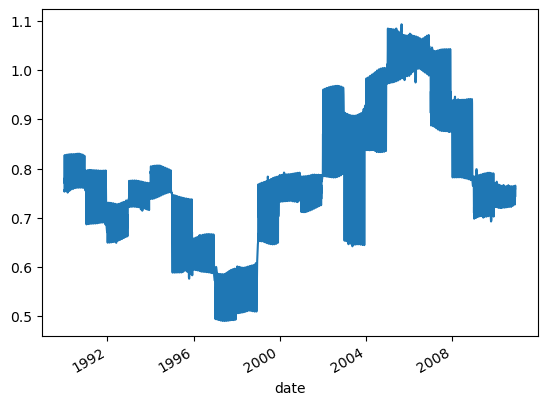

In [17]:
model.trend.plot()

<Axes: xlabel='date'>

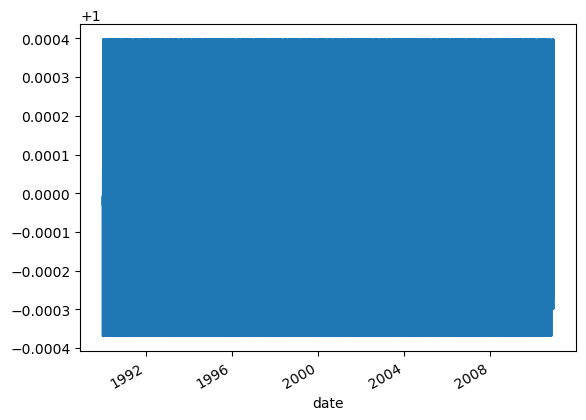

In [18]:
model.seasonal.plot()

In [19]:
## applying log

In [21]:
data=df['Ex_rate']

In [22]:
data_log=np.log(data)

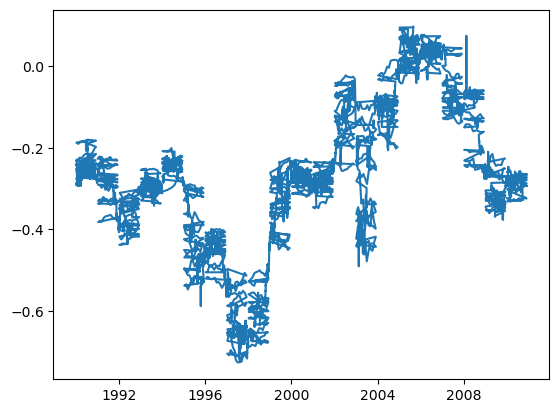

In [23]:
plt.plot(data_log)

## Rolling mean & rolling std_dev

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [25]:
d=adfuller(df['Ex_rate'])

In [26]:
d

(-1.6649941807381343,
 0.44923273535979974,
 1,
 7586,
 {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 -55835.06254628545)

In [36]:
def test_stationarity(timeseries):
    
    ## calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window=10).mean()
    rolstd = timeseries.rolling(window=10).std()
    
    original=plt.plot(timeseries,color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'red', label = 'Rooling std')
    plt.legend(loc='best')
    
    
    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index=['Test Statistic', 'P-value', '#Lags Used', 'Number of Obsevervation Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j 
    print(my_output)   
        

Results of Dickey-Fuller Test :

Test Statistic                    -1.664994
P-value                            0.449233
#Lags Used                         1.000000
Number of Obsevervation Used    7586.000000
Critical Value (1%)               -3.431212
Critical Value (5%)               -2.861921
Critical Value (10%)              -2.566973
dtype: float64


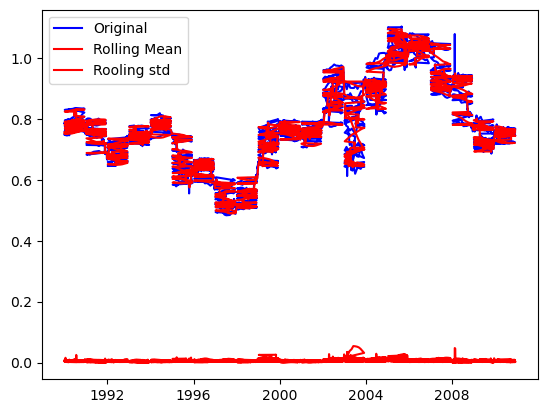

In [37]:
test_stationarity(df['Ex_rate'])

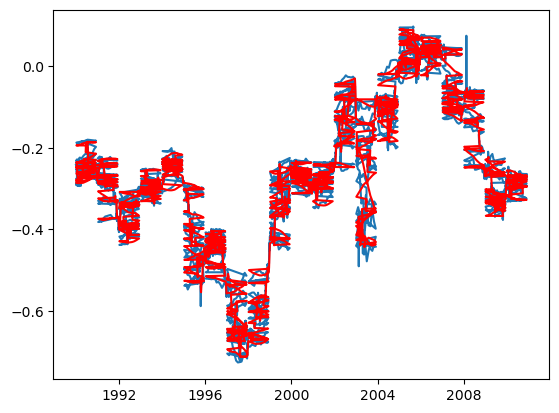

In [39]:
movingAverage = data_log.rolling(window =10 ).mean()
movingSTD = data_log.rolling(window = 10).std()
plt.plot(data_log)
plt.plot(movingAverage,color='red')

In [40]:
data_log

date
1990-01-01   -0.241435
1990-02-01   -0.246156
1990-03-01   -0.239908
1990-04-01   -0.240798
1990-05-01   -0.242199
                ...   
2010-06-10   -0.330598
2010-07-10   -0.325953
2010-08-10   -0.324074
2010-09-10   -0.327359
2010-10-10   -0.327359
Name: Ex_rate, Length: 7588, dtype: float64

In [41]:
movingAverage

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
                ...   
2010-06-10   -0.327066
2010-07-10   -0.327714
2010-08-10   -0.327971
2010-09-10   -0.328480
2010-10-10   -0.328581
Name: Ex_rate, Length: 7588, dtype: float64

## Differncing Method

In [44]:
data_log_diff = data_log - movingAverage
data_log_diff.head(15)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01         NaN
1990-08-01         NaN
1990-09-01         NaN
1990-10-01    0.002494
1990-11-01    0.004618
1990-12-01    0.006083
1990-01-13    0.004467
1990-01-14    0.005670
1990-01-15   -0.018927
Name: Ex_rate, dtype: float64

In [45]:
data_log_diff.dropna(inplace=True)
data_log_diff.shape

(7579,)

Results of Dickey-Fuller Test :

Test Statistic                 -1.421992e+01
P-value                         1.664637e-26
#Lags Used                      2.900000e+01
Number of Obsevervation Used    7.549000e+03
Critical Value (1%)            -3.431217e+00
Critical Value (5%)            -2.861923e+00
Critical Value (10%)           -2.566974e+00
dtype: float64


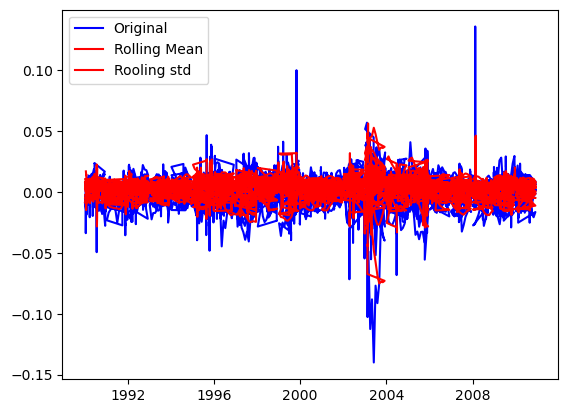

In [46]:
test_stationarity(data_log_diff)

In [47]:
## ACF Curve

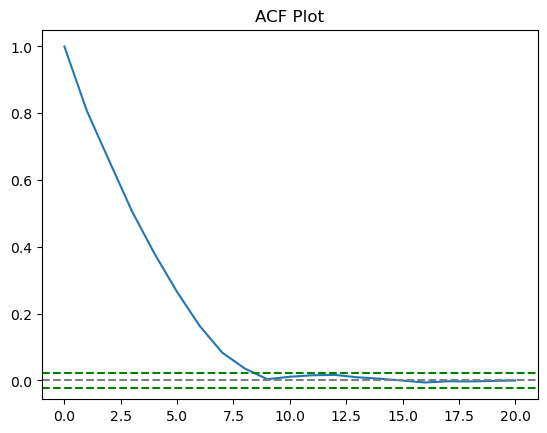

In [49]:
plt.plot(np.arange(0,21), acf(data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--',color = 'gray')
## Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)), linestyle = '--', color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

In [50]:
## PACF Curve

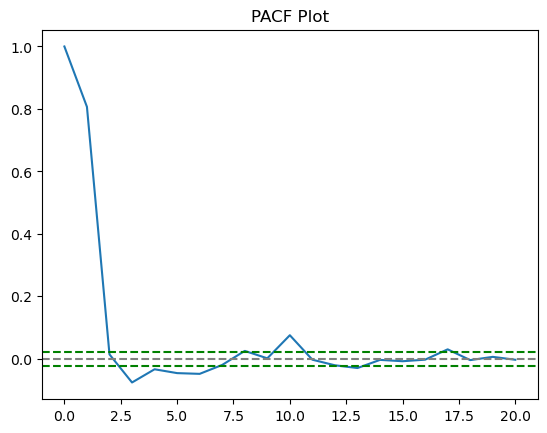

In [51]:
plt.plot(np.arange(0,21), pacf(data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [52]:
!pip install statsmodels

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Ex_rate'], order=(1,1,1))

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\

In [54]:
result= model.fit()

<Axes: xlabel='date'>

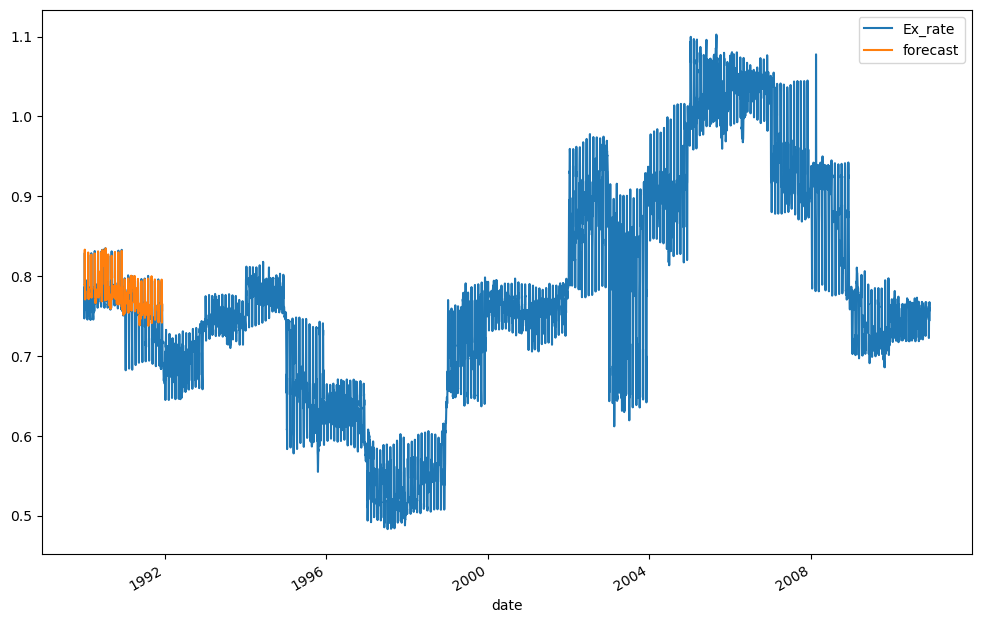

In [56]:
df['forecast']=result.predict(start=100,end=600,dynmaic=True)
df[['Ex_rate','forecast']].plot(figsize=(12,8))

In [57]:
result.predict()

date
1990-01-01    0.000000
1990-02-01    0.785500
1990-03-01    0.782286
1990-04-01    0.786058
1990-05-01    0.786089
                ...   
2010-06-10    0.718837
2010-07-10    0.718522
2010-08-10    0.721400
2010-09-10    0.723017
2010-10-10    0.721136
Name: predicted_mean, Length: 7588, dtype: float64

In [58]:
result.forecast(steps=30)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [59]:
result.fittedvalues

date
1990-01-01    0.000000
1990-02-01    0.785500
1990-03-01    0.782286
1990-04-01    0.786058
1990-05-01    0.786089
                ...   
2010-06-10    0.718837
2010-07-10    0.718522
2010-08-10    0.721400
2010-09-10    0.723017
2010-10-10    0.721136
Length: 7588, dtype: float64

In [60]:
## sarimax model

In [61]:
df

,Ex_rate,forecast
date,,
1990-01-01,0.785500,NaN
1990-02-01,0.781800,NaN
1990-03-01,0.786700,NaN
1990-04-01,0.786000,NaN
1990-05-01,0.784900,NaN
...,...,...
2010-06-10,0.718494,NaN
2010-07-10,0.721839,NaN
2010-08-10,0.723197,NaN


C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\anaconda3\Lib\

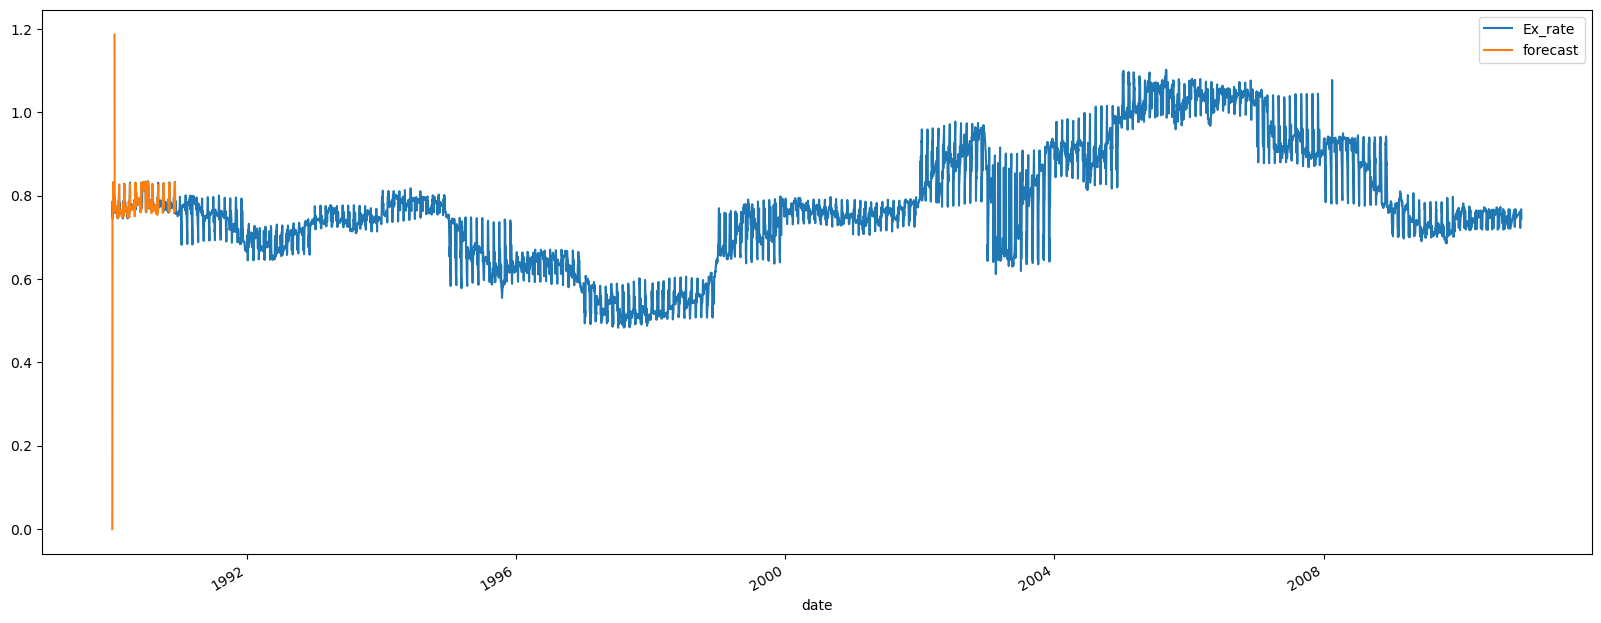

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(df['Ex_rate'],order=(1,1,1),seasonal_order=(1,1,1,12))
results1=model.fit()
df['forecast']= results1.predict(start=0,end=250)
df[['Ex_rate','forecast']].plot(figsize=(20,8))
plt.show()

<Axes: xlabel='date'>

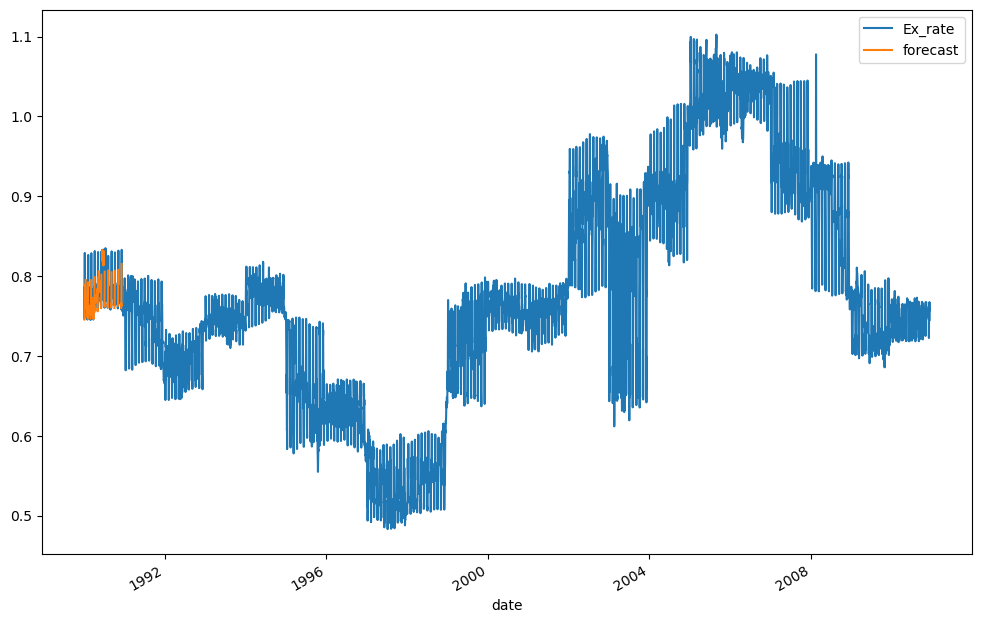

In [66]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]
pred_date_df=pd.DataFrame(index=pred_date[1:],columns=df.columns)
pred_date_df
data=pd.concat([df,pred_date_df])
df['forecast'] = result.predict(start = 14, end = 180,dynamic=False)  # dynamic = false ----> for all months

df[['Ex_rate', 'forecast']].plot(figsize=(12, 8))

In [67]:
## more visualizations

Text(0, 0.5, 'Frequence')

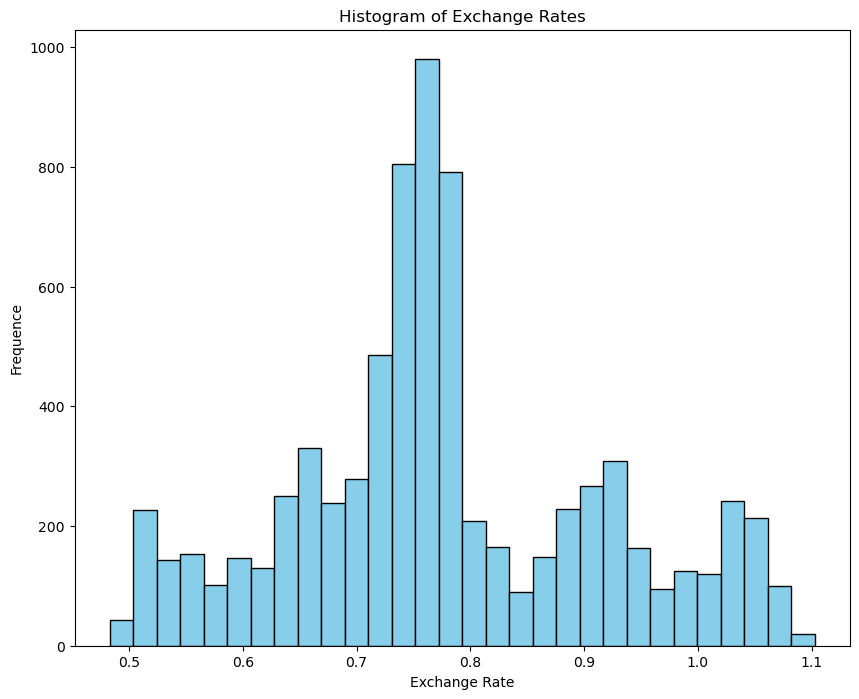

In [68]:
plt.figure(figsize=(10,8))
plt.hist(df['Ex_rate'],bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequence')


In [69]:
df.columns

Index(['Ex_rate', 'forecast'], dtype='object')

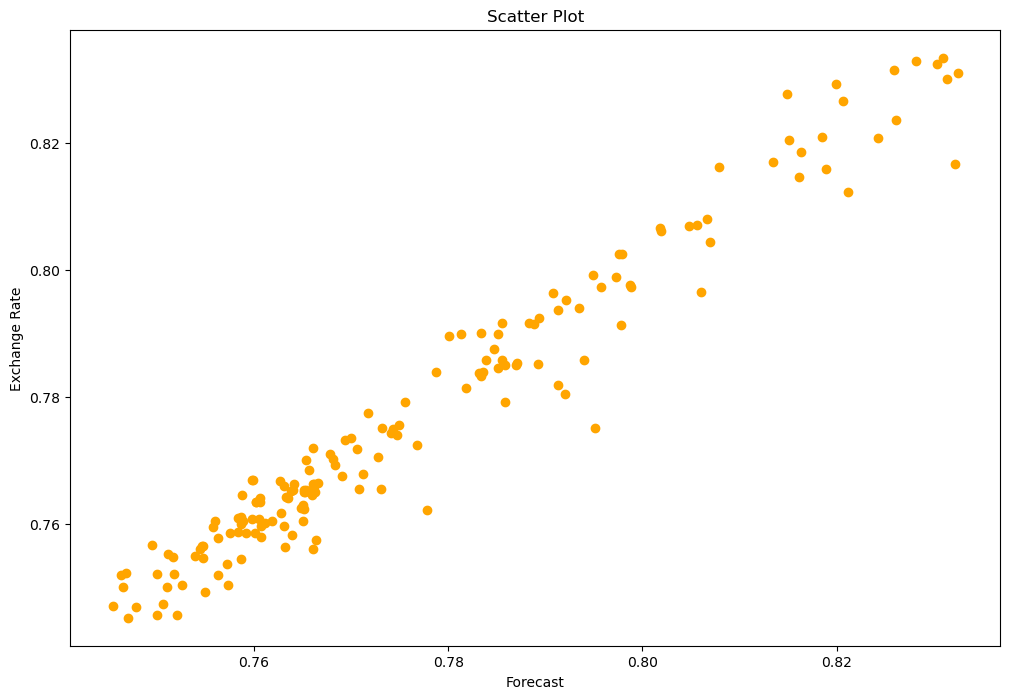

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(df['forecast'],df['Ex_rate'],color='orange')
plt.title('Scatter Plot')
plt.xlabel('Forecast')
plt.ylabel('Exchange Rate')
plt.show()